In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler

In [30]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [1]:
import pandas as pd

data = pd.read_csv('/content/Food_Time_Data_Set.csv')

data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


In [2]:
print("data shape: " ,data.shape)
print("columns:" , data.columns)

data shape:  (10001, 18)
columns: Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Unnamed: 14', 'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')


In [3]:
print(data.describe())
print(data.info())

       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         10000.000000             10000.000000         10000.000000   
mean             29.522000                 4.629370            16.893418   
std               5.700348                 0.322941             8.330948   
min              15.000000                 1.000000           -30.902872   
25%              25.000000                 4.500000            12.913041   
50%              29.000000                 4.700000            18.546258   
75%              34.000000                 4.800000            22.727021   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          10000.000000                10000.000000   
mean              70.177749                   17.412655   
std               23.203352                    7.336846   
min              -88.352885                    0.010000   
25%               73

In [4]:
data = data.drop('Unnamed: 14' , axis = 1)

In [5]:
print(data.isnull().sum())

ID                               1
Delivery_person_ID               1
Delivery_person_Age              1
Delivery_person_Ratings          1
Restaurant_latitude              1
Restaurant_longitude             1
Delivery_location_latitude       1
Delivery_location_longitude      1
Type_of_order                    1
Type_of_vehicle                  1
temperature                      6
humidity                         6
precipitation                    6
weather_description              6
Traffic_Level                  916
Distance (km)                  921
TARGET                         542
dtype: int64


In [6]:
print(data.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')


In [7]:
print(data)

         ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                 37.0                      4.9   
1      B379     BANGRES18DEL02                 34.0                      4.5   
2      5D6D     BANGRES19DEL01                 23.0                      4.4   
3      7A6A    COIMBRES13DEL02                 38.0                      4.7   
4      70A2     CHENRES12DEL01                 32.0                      4.6   
...     ...                ...                  ...                      ...   
9996   11B4      VADRES13DEL03                 32.0                      4.2   
9997   8336      HYDRES20DEL01                 36.0                      4.7   
9998   338B      JAPRES18DEL03                 37.0                      4.6   
9999   3FB2      MUMRES11DEL03                 29.0                      4.7   
10000   NaN                NaN                  NaN                      NaN   

       Restaurant_latitude  Restaurant_

In [8]:
print(data.isnull().sum())

ID                               1
Delivery_person_ID               1
Delivery_person_Age              1
Delivery_person_Ratings          1
Restaurant_latitude              1
Restaurant_longitude             1
Delivery_location_latitude       1
Delivery_location_longitude      1
Type_of_order                    1
Type_of_vehicle                  1
temperature                      6
humidity                         6
precipitation                    6
weather_description              6
Traffic_Level                  916
Distance (km)                  921
TARGET                         542
dtype: int64


In [9]:
data.drop(['Traffic_Level','Distance (km)'], axis=1)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,43.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,32.61666667
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,12.01666667
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,51.06666667
9999,3FB2,MUMRES11DEL03,29.0,4.7,18.994237,72.825553,19.084237,72.915553,Meal,scooter,28.01,57.0,0.0,smoke,43.8


In [10]:
data = data.dropna(subset=['TARGET'])

In [11]:
print(data.isnull().sum())

ID                               0
Delivery_person_ID               0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Type_of_order                    0
Type_of_vehicle                  0
temperature                      0
humidity                         0
precipitation                    0
weather_description              0
Traffic_Level                  419
Distance (km)                  424
TARGET                           0
dtype: int64


In [12]:
data = data.drop('Traffic_Level', axis=1)

In [13]:
data.shape

(9459, 16)

In [14]:
from geopy.distance import geodesic

In [15]:
def calculate_distance(row):
  if pd.notna(row['Restaurant_latitude']) and pd.notna(row['Restaurant_longitude']):
    restarunt = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(restarunt, delivery).km
  else:
    return None

data['Distance (km)'] = data.apply(calculate_distance, axis=1)

In [16]:
print(data.isnull().sum())

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
temperature                    0
humidity                       0
precipitation                  0
weather_description            0
Distance (km)                  0
TARGET                         0
dtype: int64


In [17]:
print(data.duplicated(subset=['ID']).sum())

5


In [18]:
data = data.drop_duplicates(subset=['ID'], keep='first')

In [19]:
print(data.duplicated(subset=['ID']).sum())

0


Data insights


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

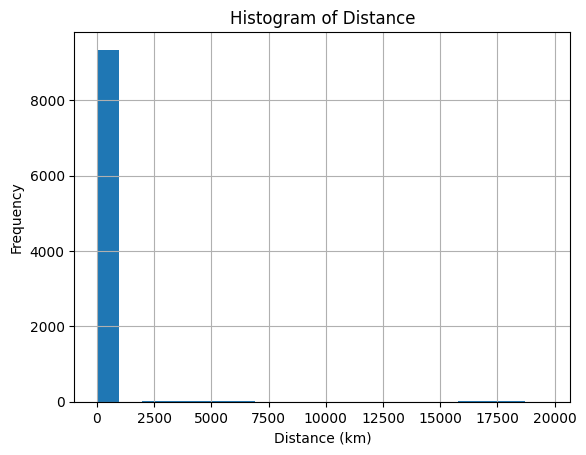

In [21]:

data['Distance (km)'].hist(bins=20)
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance')
plt.show()


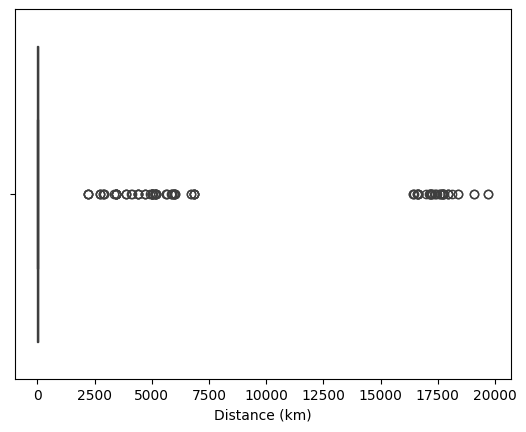

In [22]:
#box plot

sns.boxplot(x= data['Distance (km)'])
plt.show()

In [24]:
x = data.drop('TARGET' , axis=1)
y = data['TARGET']

In [25]:
x = pd.get_dummies(x , columns=['Type_of_order','Type_of_vehicle','weather_description'], drop_first=True)

In [26]:
scaler = StandardScaler()
x[['Distance (km)','temperature','humidity','precipitation']] = scaler.fit_transform(x[['Distance (km)','temperature','humidity','precipitation']])


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
print(x_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Distance (km)', 'Type_of_order_Drinks ',
       'Type_of_order_Meal ', 'Type_of_order_Snack ',
       'Type_of_vehicle_electric_scooter ', 'Type_of_vehicle_motorcycle ',
       'Type_of_vehicle_scooter ', 'weather_description_clear sky',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_haze', 'weather_description_mist',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_scattered clouds', 'weather_description_smoke'],
      dtype='object')


In [33]:
x_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,...,Type_of_vehicle_scooter,weather_description_clear sky,weather_description_few clouds,weather_description_fog,weather_description_haze,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_smoke
2554,8692,MUMRES08DEL02,30.0,4.9,19.065838,72.832658,19.085838,72.852658,1.263601,-1.368203,...,False,False,False,False,False,False,False,False,False,True
6444,B3E3,BANGRES06DEL02,27.0,4.8,12.979096,77.640625,13.029096,77.690625,-0.033469,0.565230,...,False,False,False,False,True,False,False,False,False,False
4185,4330,HYDRES13DEL02,29.0,4.8,17.431477,78.400350,17.481477,78.450350,-0.398548,-0.079247,...,True,False,False,False,False,False,False,False,False,False
7902,2273,VADRES05DEL03,22.0,4.3,22.310526,73.170937,22.340526,73.200937,0.373164,-0.079247,...,False,False,False,False,True,False,False,False,False,False
5425,DEAE,LUDHRES13DEL02,34.0,3.8,30.893234,75.821720,31.023234,75.951720,0.212885,-1.690442,...,True,True,False,False,False,False,False,False,False,False


In [34]:
x_train = x_train.drop('ID' , axis = 1)
x_train = x_train.drop('Delivery_person_ID' , axis = 1)
x_test = x_test.drop('ID' , axis = 1)
x_test = x_test.drop('Delivery_person_ID' , axis = 1)

In [35]:
boolean_columns =  ['Type_of_order_Drinks ',
       'Type_of_order_Meal ', 'Type_of_order_Snack ',
       'Type_of_vehicle_electric_scooter ', 'Type_of_vehicle_motorcycle ',
       'Type_of_vehicle_scooter ', 'weather_description_clear sky',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_haze', 'weather_description_mist',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_scattered clouds', 'weather_description_smoke']

for column in boolean_columns:
    x_train[column] = x_train[column].astype(int)
    x_test[column] = x_test[column].astype(int)

In [36]:
x_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),...,Type_of_vehicle_scooter,weather_description_clear sky,weather_description_few clouds,weather_description_fog,weather_description_haze,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_smoke
2554,30.0,4.9,19.065838,72.832658,19.085838,72.852658,1.263601,-1.368203,-0.020145,-0.094868,...,0,0,0,0,0,0,0,0,0,1
6444,27.0,4.8,12.979096,77.640625,13.029096,77.690625,-0.033469,0.565230,-0.020145,-0.091021,...,0,0,0,0,1,0,0,0,0,0
4185,29.0,4.8,17.431477,78.400350,17.481477,78.450350,-0.398548,-0.079247,-0.020145,-0.091084,...,1,0,0,0,0,0,0,0,0,0
7902,22.0,4.3,22.310526,73.170937,22.340526,73.200937,0.373164,-0.079247,-0.020145,-0.093653,...,0,0,0,0,1,0,0,0,0,0
5425,34.0,3.8,30.893234,75.821720,31.023234,75.951720,0.212885,-1.690442,-0.020145,-0.081773,...,1,1,0,0,0,0,0,0,0,0


In [38]:
y_train.head()

,TARGET
2554,28.5
6444,35
4185,33.4
7902,18.7
5425,52.83333333


In [45]:
y_train = pd.to_numeric(y_train, errors='coerce')  # Convert the object type to numeric
y_test = pd.to_numeric(y_test, errors='coerce')

In [46]:
print(y_train.isna().sum())  # Count NaN values
print(y_test.isna().sum())

344
74


In [47]:
y_train = y_train.dropna()  # Drop rows with NaN values
y_test = y_test.dropna()

In [49]:
print(y_train.head())         # Display the first few rows
print(y_train.dtype)          # Check the current data type
print(y_train.unique())       # View all unique values
print(y_train.isna().sum())   # Count of NaN values (if any)


2554    28.500000
6444    35.000000
4185    33.400000
7902    18.700000
5425    52.833333
Name: TARGET, dtype: float64
float64
[28.5        35.         33.4        ... 59.21666667 63.33333333
 63.5       ]
0


In [51]:
x_train = x_train.loc[y_train.index]
x_test = x_test.loc[y_test.index]

In [52]:
print(x_train.shape)
print(x_test.shape)

(7219, 25)
(1817, 25)


In [53]:
print(y_train.shape)
print(y_test.shape)

(7219,)
(1817,)


In [54]:
from catboost import CatBoostRegressor

# Initialize the CatBoost Regressor
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', random_state=42)

# Train the model on one-hot encoded data
model.fit(x_train, y_train, verbose=100)

# Predict
y_pred = model.predict(x_test)


0:	learn: 15.5803163	total: 50ms	remaining: 50s
100:	learn: 5.0865875	total: 342ms	remaining: 3.04s
200:	learn: 4.2903603	total: 622ms	remaining: 2.47s
300:	learn: 3.8812897	total: 901ms	remaining: 2.09s
400:	learn: 3.5815006	total: 1.18s	remaining: 1.76s
500:	learn: 3.3465059	total: 1.47s	remaining: 1.47s
600:	learn: 3.1631554	total: 1.75s	remaining: 1.16s
700:	learn: 3.0042998	total: 2.03s	remaining: 864ms
800:	learn: 2.8646183	total: 2.32s	remaining: 577ms
900:	learn: 2.7335434	total: 2.6s	remaining: 286ms
999:	learn: 2.6210729	total: 2.87s	remaining: 0us


In [59]:
print(y_test.head())
print(y_pred[:5])
print(y_test.dtype)
print(type(y_pred))


6651    39.816667
4568    57.500000
5175    26.616667
2994    25.316667
4314    31.600000
Name: TARGET, dtype: float64
[41.76300237 58.70964312 24.22111745 28.22564738 35.5587368 ]
float64
<class 'numpy.ndarray'>


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [62]:

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 2.89
Mean Squared Error (MSE): 15.76
Root Mean Squared Error (RMSE): 3.97
R² Score: 0.94


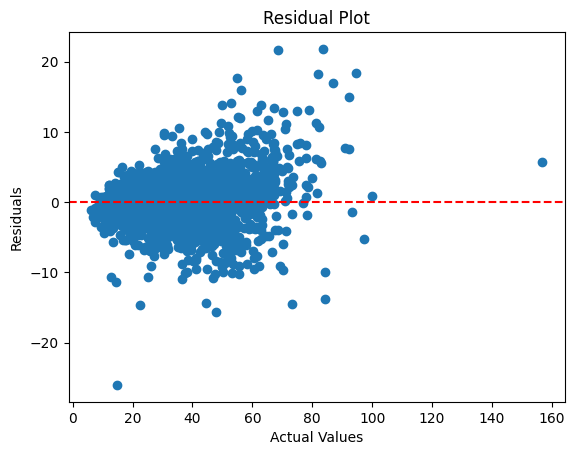

In [63]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
